# MODEL FINE TUNING


In [1]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
with open("/content/drive/MyDrive/Tree_Project/data_occluded.yaml", "w") as f:
    f.write("""train: /content/drive/MyDrive/Tree_Project/Trees_occ/images
val:  /content/drive/MyDrive/Tree_Project/Trees_occ/images
nc: 2
names: ['Car','Vacant']
""")

In [ ]:
!yolo detect train \
  model=/content/drive/MyDrive/runs/detect/train4/weights/best.pt \
  data=/content/drive/MyDrive/Tree_Project/data_occluded.yaml \
  epochs=30 \
  imgsz=640 \
  batch=16 \
  name=finetune_with_trees

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Tree_Project/data_occluded.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/runs/detect/train4/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=finetune_with_trees, nbs=64, nms=False, opset=None, optimize=False, optimizer=au

In [ ]:
model = YOLO("runs/detect/finetune_with_trees/weights/best.pt")


In [ ]:
metrics = model.val()

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.4±0.2 ms, read: 60.2±40.7 MB/s, size: 214.2 KB)


val: Scanning /content/drive/MyDrive/Tree_Project/Trees_occ/labels.cache... 314 images, 0 backgrounds, 0 corrupt: 100%|██████████| 314/314 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:08<00:00,  2.29it/s]


                   all        314       6135       0.96      0.742      0.765      0.595
                   Car        314       6127      0.921      0.999      0.991      0.775
                Vacant          8          8          1      0.486      0.539      0.414
Speed: 0.6ms preprocess, 7.8ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/val2


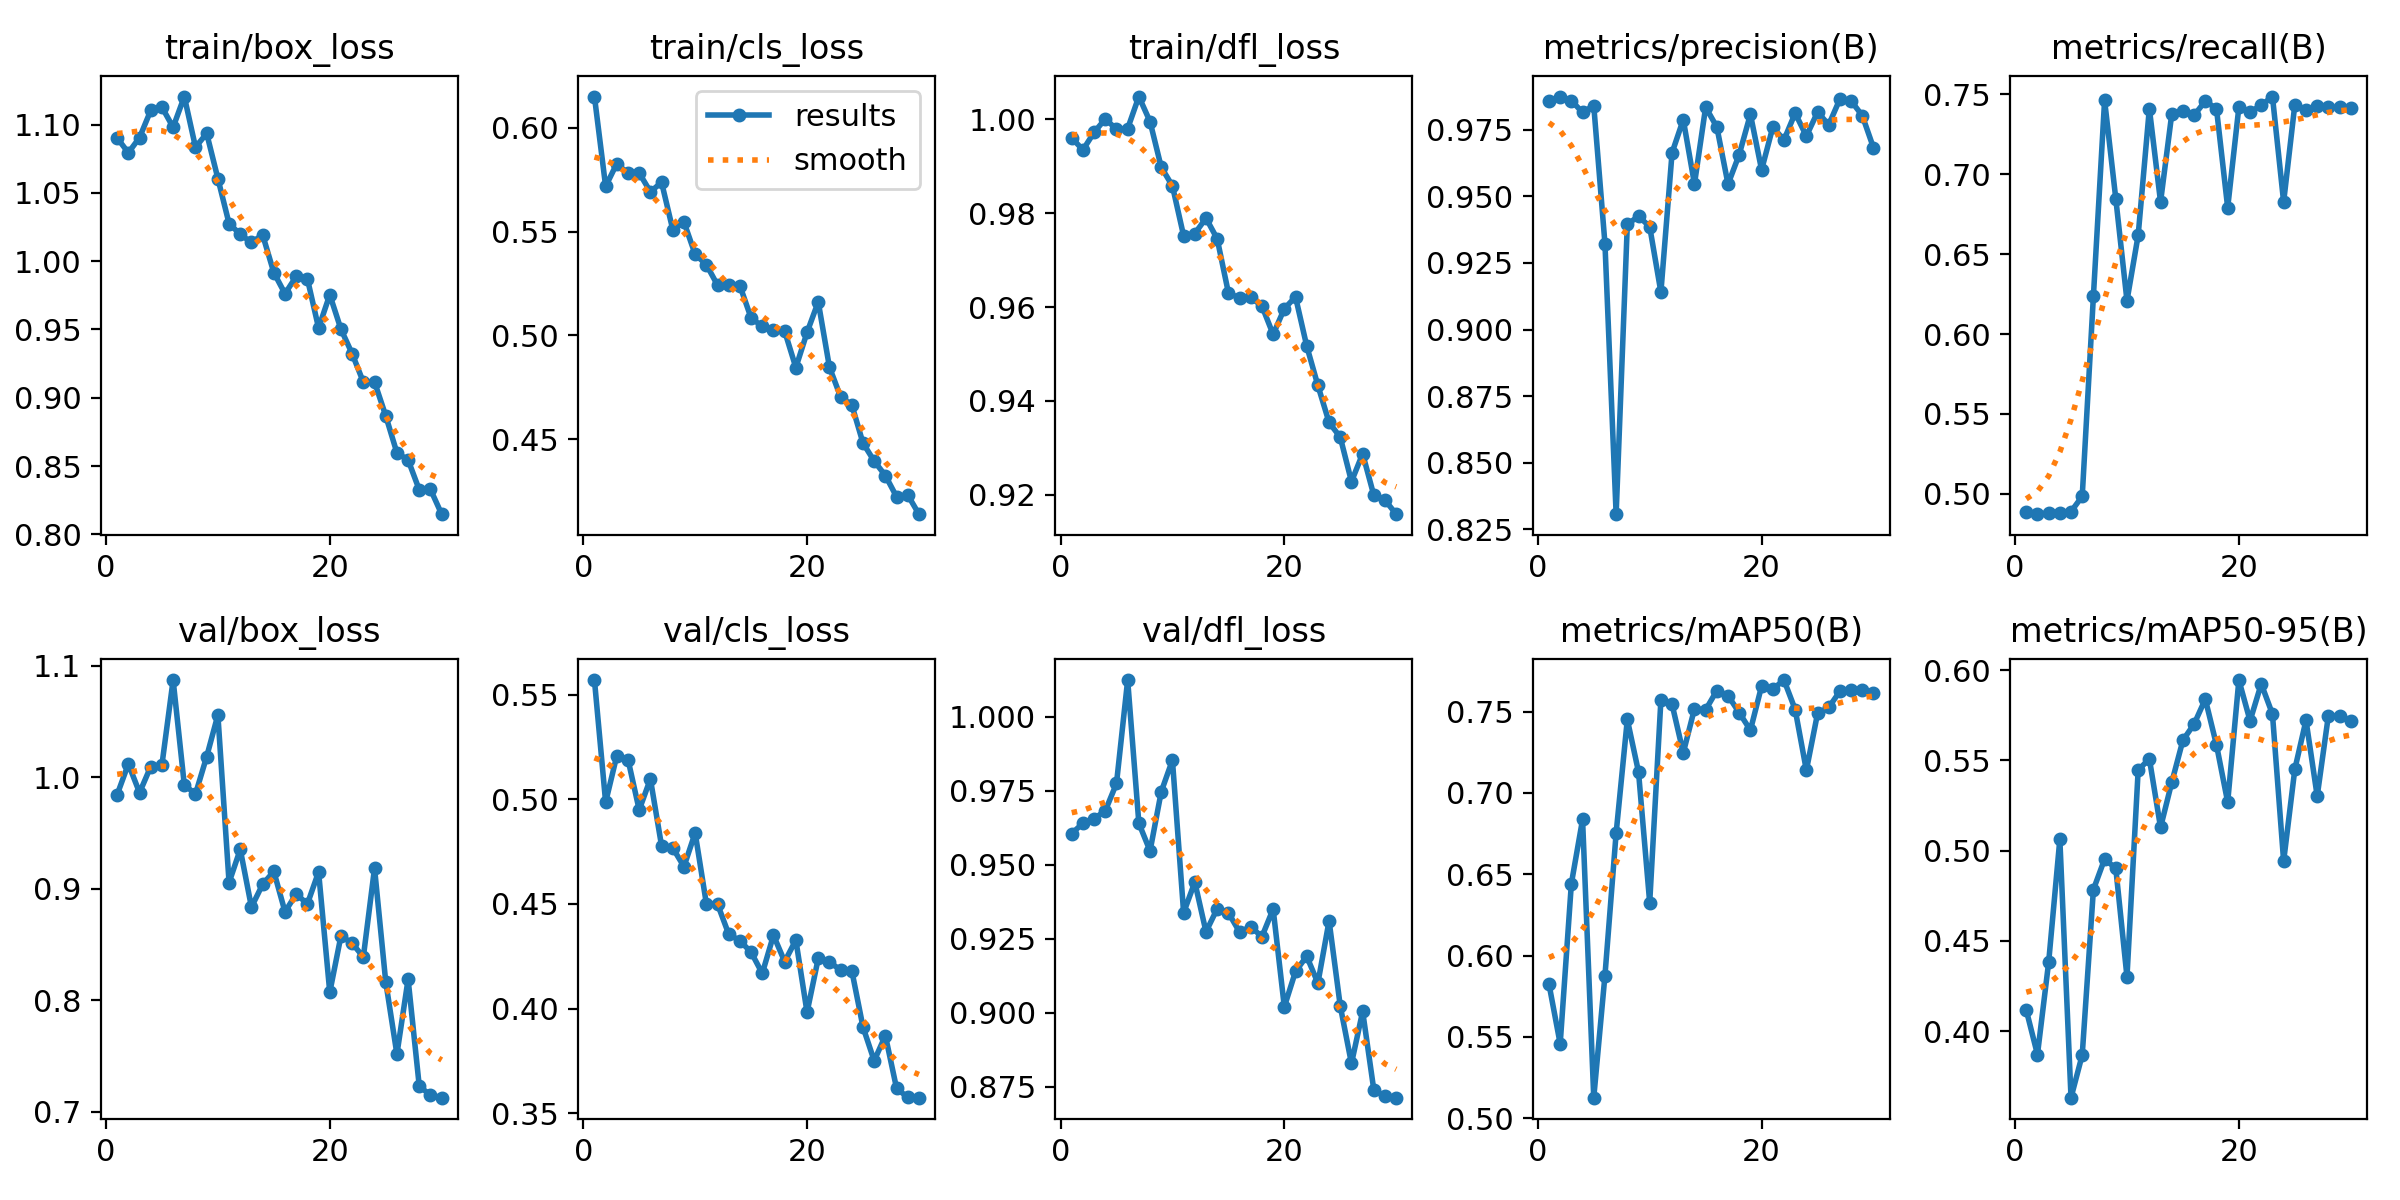

In [ ]:
from IPython.display import Image, display

display(Image(filename='/content/runs/detect/finetune_with_trees/results.png'))
# display(Image(filename='/content/runs/detect/confusion_matrix.png'))
# display(Image(filename='/content/runs/detect/predictions.jpg'))

# INFERENCE

In [ ]:
model = YOLO('drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best.pt')
results = model.predict(source = "DJI_0514.jpg" , conf = 0.2 , save =True)


image 1/1 /content/DJI_0514.jpg: 640x640 51 Cars, 8.1ms
Speed: 3.3ms preprocess, 8.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict10


**IMAGE WIHTOUT SCORES**

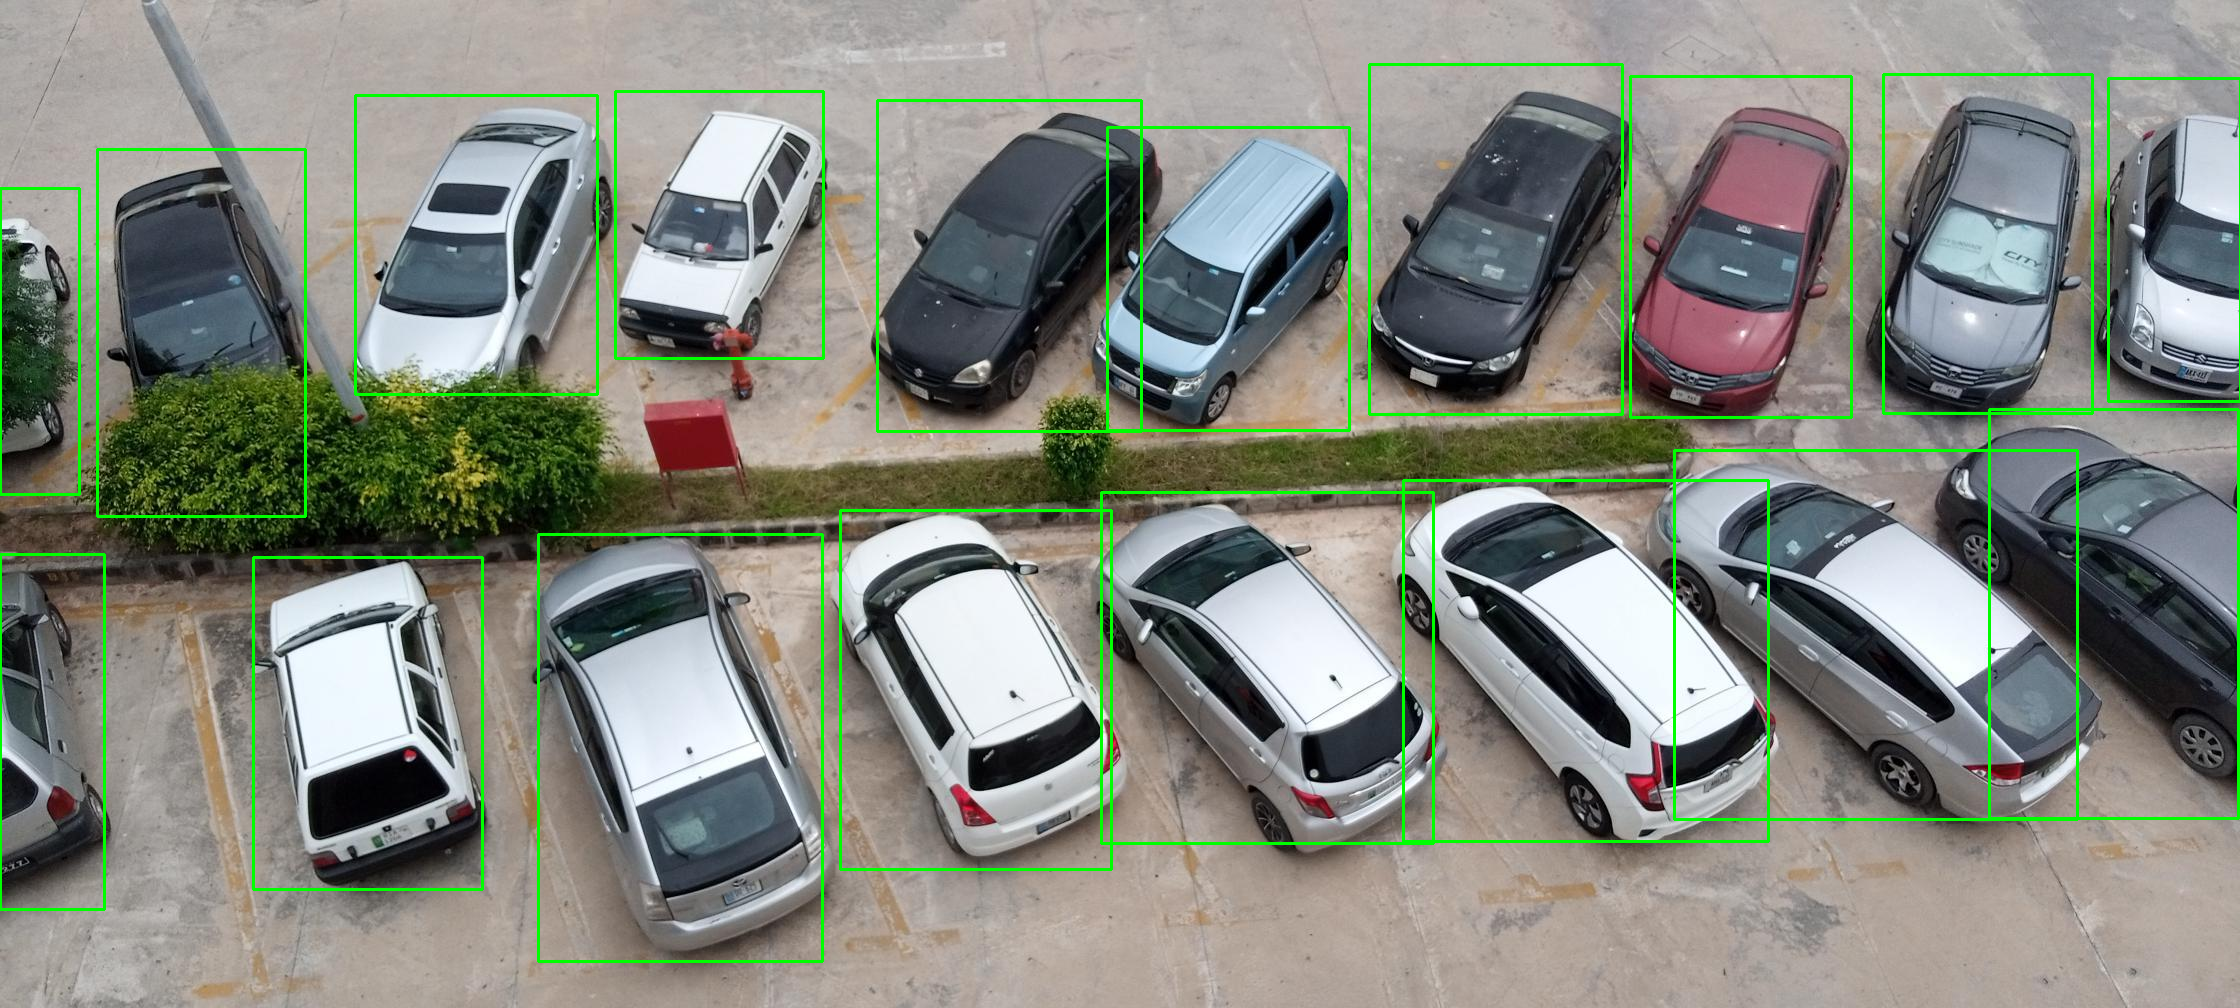

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow

# Load model
model = YOLO('drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best.pt')

# Read image
image_path = "Media (5).jfif"
image = cv2.imread(image_path)

# Run prediction
results = model.predict(source=image, conf=0.1, verbose=False)
result = results[0]  # First image result

# Draw bounding boxes without scores
for box in result.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    cls_id = int(box.cls[0])


    # Draw rectangle and class label (no confidence score)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)


# Save output image
cv2_imshow(image)


**VIDEO WITHOUT SCORES**

In [2]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best.pt')

# Open the input video
video_path = "/content/drive/MyDrive/Copy of Screen Recording 2025-03-17 at 1.48.06 PM.mov"
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # You can also use 'XVID'
out = cv2.VideoWriter("output_video_no_scores.mp4", fourcc, fps, (width, height))

# Process video frame by frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run prediction
    results = model.predict(source=frame, conf=0.5, verbose=False)
    result = results[0]

    # Draw bounding boxes without scores
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls_id = int(box.cls[0])
        label = model.names[cls_id]

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Write the processed frame to output
    out.write(frame)

# Release everything
cap.release()
out.release()



# OUTPUT TENSORS


image 1/1 /content/Test.jpg: 448x640 60 Cars, 8.5ms
Speed: 9.5ms preprocess, 8.5ms inference, 2.1ms postprocess per image at shape (1, 3, 448, 640)
Post-NMS Detections:
tensor([[7.1831e+02, 6.3413e+02, 8.2554e+02, 7.5233e+02, 9.4016e-01, 0.0000e+00],
        [1.0520e+03, 6.3999e+02, 1.1556e+03, 7.7029e+02, 8.9579e-01, 0.0000e+00],
        [7.1259e+00, 6.5379e+02, 1.6821e+02, 7.7090e+02, 8.9265e-01, 0.0000e+00],
        [5.0007e+02, 5.4133e+02, 6.1671e+02, 6.3970e+02, 8.7964e-01, 0.0000e+00],
        [6.0788e+02, 4.4768e+02, 7.1561e+02, 5.5326e+02, 8.6373e-01, 0.0000e+00],
        [6.3962e+02, 6.0233e+02, 7.5279e+02, 7.1377e+02, 8.6252e-01, 0.0000e+00],
        [6.7790e+02, 4.7390e+02, 7.8625e+02, 5.8068e+02, 8.4584e-01, 0.0000e+00],
        [5.8435e+02, 5.6792e+02, 6.8587e+02, 6.6475e+02, 8.4563e-01, 0.0000e+00],
        [3.0375e+02, 4.2184e+02, 4.1220e+02, 5.0828e+02, 8.3894e-01, 0.0000e+00],
        [1.5125e+02, 7.1718e+02, 2.9216e+02, 8.0986e+02, 8.0569e-01, 0.0000e+00],
        [7

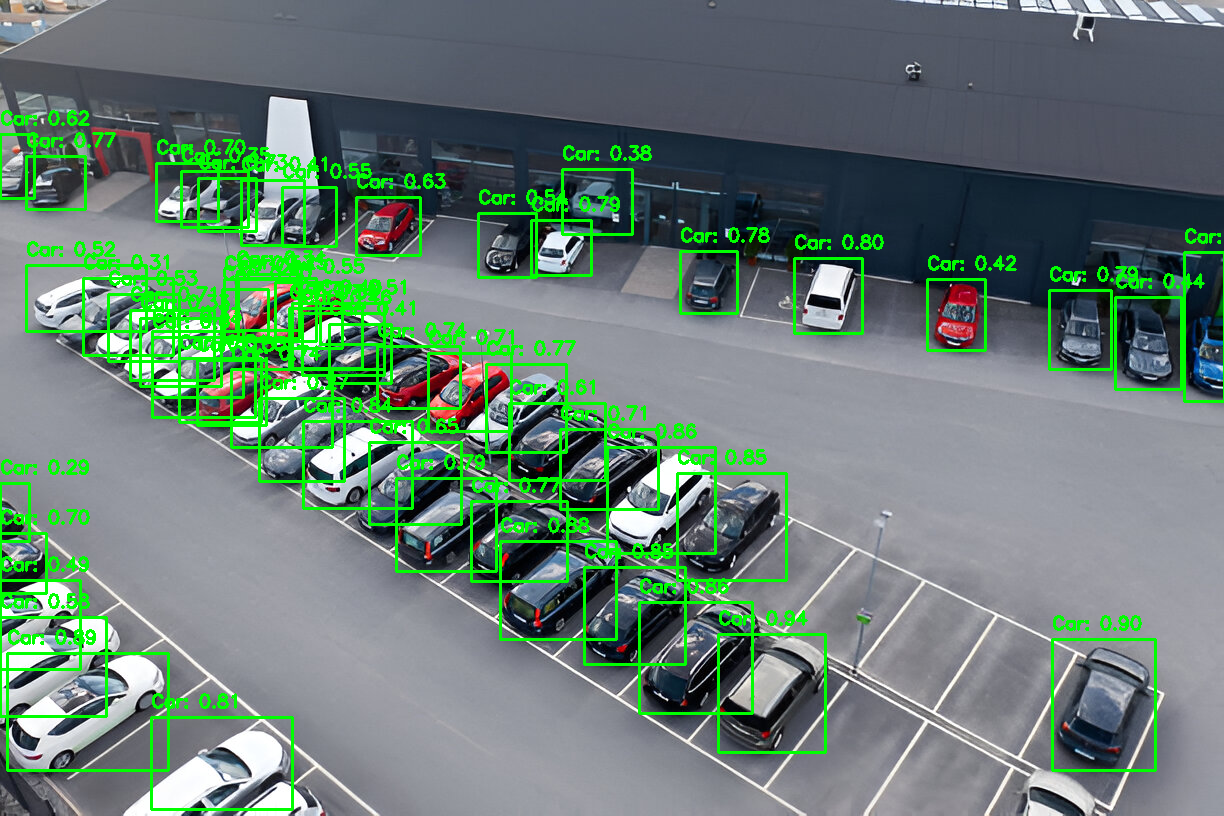

In [ ]:
from ultralytics import YOLO
import cv2
import torch
from google.colab.patches import cv2_imshow

#  Load trained YOLO model
model = YOLO('drive/MyDrive/runs/detect/train4/weights/best.pt')


# Run inference on an image
results = model("Test.jpg")

## Print detections
result = results[0]

print("Post-NMS Detections:")
print(result.boxes.data)

print("\nFormatted detections:")
for box in result.boxes.data:
    x1, y1, x2, y2, conf, cls = box.tolist()
    print(f"Class: {int(cls)}, Confidence: {conf:.2f}, Box: ({x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f})")

image_path = "Test.jpg"
img = cv2.imread(image_path)

# Draw boxes and labels
for box in result.boxes.data:
    x1, y1, x2, y2, conf, cls = box.tolist()
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])
    cv2.rectangle(img, (x1, y1), (x2, y2), color=(0, 255, 0), thickness=2)
    label = f"Car: {conf:.2f}"
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)


cv2_imshow(img)


# **Exporting the Model**

In [ ]:
!pip install tensorflowjs
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Load your trained model (adjust path if it's in Google Drive)
model = YOLO("drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best.pt")

# Export to TensorFlow SavedModel format
model.export(format="tfsavedmodel")

WARNING ⚠️ Invalid export format='tfsavedmodel', updating to format='saved_model'
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'ai-edge-litert>=1.2.0,<1.4.0', 'onnx>=1.12.0,<1.18.0', 'onnx2tf>=1.26.3', 'onnxslim>=0.1.59', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 4.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


TensorFlow SavedModel: starting export with tensorflow 2.19.0...


Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 49.87file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.63...
ONNX: export success ✅ 3.3s, saved as 'drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.28.2...
Saved artifact at 'drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best_saved_model'. The following endpoints are available:

* Endpoint 'serving_default'
  inputs_0 (POSITIONAL_ONLY): TensorSpec(shape=(1, 640, 640, 3), dtype=tf.float32, name='images')
Output Type:
  TensorSpec(shape=(1, 6, 8400), dtype=tf.float32, name=None)
Captures:
  138396054466640: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  138396054466256: TensorSpec(shape=(3, 3, 3, 16), dtype=tf.float32, name=None)
  138396054467024: TensorSpec(shape=(16,), dtype=tf.float32, name=None)
  138396002075280: TensorSpec(shape=(4, 2), dtype=tf.int32, name=None)
  138396054468560: TensorSpec(shape=(3, 3, 16, 32), dtype=tf.float32, name=None)
  138396002074896: TensorSpec(shape=(32,), dtyp

'drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best_saved_model'

In [ ]:
!tensorflowjs_converter \
  --input_format=tf_saved_model \
  --output_format=tfjs_graph_model \
  drive/MyDrive/runs-trees/detect/finetune_with_trees/weights/best_saved_model \
  tfjs_model

E0000 00:00:1754568670.370374   18400 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754568670.390372   18400 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754568670.465997   18400 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754568670.466032   18400 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754568670.466040   18400 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754568670.466046   18400 computation_placer.cc:177] computation placer already registered. Please check linka

In [ ]:
!zip -r tfjs_model.zip tfjs_model

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of3.bin (deflated 11%)
  adding: tfjs_model/group1-shard2of3.bin (deflated 7%)
  adding: tfjs_model/group1-shard3of3.bin (deflated 7%)
  adding: tfjs_model/model.json (deflated 95%)
